In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"
data=pd.read_csv(filename,header=None)
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
data.columns=headers
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [12]:
data['horsepower'].dropna(inplace=True)
data['horsepower'].isnull().value_counts()
np.nan_to_num(data['horsepower'])

array(['111', '111', '154', '102', '115', '110', '110', '110', '140',
       '160', '101', '101', '121', '121', '121', '182', '182', '182',
       '48', '70', '70', '68', '68', '102', '68', '68', '68', '102', '88',
       '145', '58', '76', '60', '76', '76', '76', '76', '86', '86', '86',
       '86', '101', '100', '78', '70', '70', '90', '176', '176', '262',
       '68', '68', '68', '68', '68', '101', '101', '101', '135', '84',
       '84', '84', '84', '64', '84', '120', '72', '123', '123', '123',
       '123', '155', '155', '184', '184', '175', '68', '68', '68', '102',
       '116', '88', '145', '145', '145', '88', '88', '116', '116', '69',
       '55', '69', '69', '69', '69', '69', '69', '69', '69', '97', '97',
       '152', '152', '152', '160', '200', '160', '97', '95', '97', '95',
       '95', '95', '95', '95', '97', '95', '142', '68', '102', '68', '68',
       '68', '88', '145', '143', '207', '207', '207', '288', '?', '?',
       '110', '110', '110', '110', '160', '160', '69', '73

In [6]:
data['horsepower']=data['horsepower'].astype('float')

ValueError: could not convert string to float: '?'

In [4]:
bins=np.linspace(data['horsepower'].min(),data['horsepower'].max(),4)
bins

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

In [21]:
count,edge=np.histogram(data['horsepower'],bins=4,range=(data['horsepower'].min(),data['horsepower'].max()))

/home/kanishk/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/kanishk/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


In [22]:
count

array([123,  66,  12,   2])

In [23]:
edge

array([ 48., 108., 168., 228., 288.])

In [24]:
n=pd.cut(data['horsepower'],bins,include_lowest=True,labels=['low','medium','high'])
n

0         low
1         low
2      medium
3         low
4         low
        ...  
200       low
201    medium
202    medium
203       low
204       low
Name: horsepower, Length: 205, dtype: category
Categories (3, object): [low < medium < high]

In [25]:
p=pd.cut(data['horsepower'],labels=['lowest','low','medium','high'],bins=edge,include_lowest=True)
p

0         low
1         low
2         low
3      lowest
4         low
        ...  
200       low
201       low
202       low
203    lowest
204       low
Name: horsepower, Length: 205, dtype: category
Categories (4, object): [lowest < low < medium < high]

In [26]:
from scipy import stats
y=data['price']
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500,18,22,17450


In [27]:
data['price']=data['price'].astype('float')

In [28]:
data['price'].dropna(inplace=True)

In [29]:
data['horsepower'].dropna(inplace=True)

In [30]:
data.dropna(subset=['price','horsepower'],axis=0,inplace=True)

In [31]:
data[['price','horsepower']].isnull().sum()

price         0
horsepower    0
dtype: int64

In [32]:
corr_coeff,p_value=stats.pearsonr(data['price'],data['horsepower'])

In [33]:
corr_coeff

0.8105330821322063

In [34]:
p_value

1.1891278276946466e-47

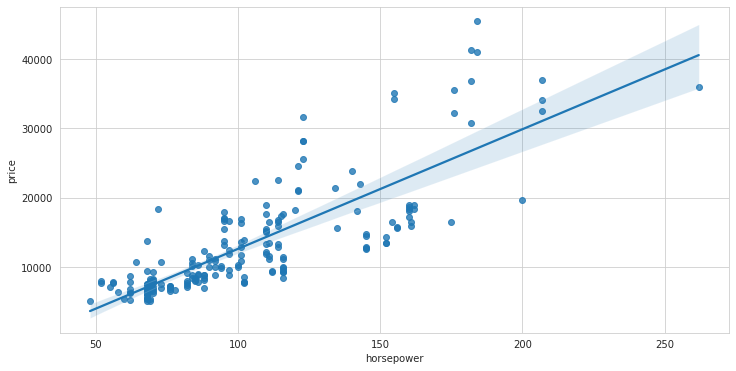

In [36]:
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.regplot(x='horsepower',y='price',data=data)

In [38]:
x=data['horsepower']
y=data['price']
f=np.polyfit(x,y,2)
f

array([ 1.92204405e-01,  1.24302382e+02, -1.93360644e+03])

In [39]:
exp=np.poly1d(f)
new=data[['engine-type','price']].groupby('engine-type')
x=new.get_group('dohc')
y=new.get_group('ohcv')
groped=new.mean()

In [40]:
f_vlue,p_value=stats.f_oneway(x['price'],data['price'])

In [41]:
f_vlue,p_value

(4.22241855243092, 0.041137066513149544)

In [45]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
data.isnull().sum()
data.drop(['normalized-losses'],axis=1,inplace=True)

In [57]:
data.dropna(inplace=True)

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,city-mpg,highway-mpg,price
0,3,88.6,168.8,64.1,48.8,2548,130,9.0,111.0,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,9.0,111.0,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,9.0,154.0,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,10.0,102.0,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,8.0,115.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,9.5,114.0,23,28,16845.0
201,-1,109.1,188.8,68.8,55.5,3049,141,8.7,160.0,19,25,19045.0
202,-1,109.1,188.8,68.9,55.5,3012,173,8.8,134.0,18,23,21485.0
203,-1,109.1,188.8,68.9,55.5,3217,145,23.0,106.0,26,27,22470.0


In [56]:
for columns in data.columns:
    if all(isinstance(value,str) for value in data[columns]):
        data.drop([columns],inplace=True,axis=1)

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,city-mpg,highway-mpg,price
0,3,88.6,168.8,64.1,48.8,2548,130,9.0,111.0,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,9.0,111.0,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,9.0,154.0,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,10.0,102.0,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,8.0,115.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,9.5,114.0,23,28,16845.0
201,-1,109.1,188.8,68.8,55.5,3049,141,8.7,160.0,19,25,19045.0
202,-1,109.1,188.8,68.9,55.5,3012,173,8.8,134.0,18,23,21485.0
203,-1,109.1,188.8,68.9,55.5,3217,145,23.0,106.0,26,27,22470.0


In [58]:
data.drop(['symboling'],axis=1,inplace=True)

In [113]:
y=data['price']
x=data.drop(['price'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.67,random_state=1)

In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
input=[('scale',StandardScaler()),('model',LinearRegression())]
pipeline=Pipeline(input)
pipeline.fit(x_train,y_train)
pipeline.score(x_test,y_test)

0.84496829373725

In [131]:
from sklearn.model_selection import cross_val_score
cross=cross_val_score(pipeline,x,y,cv=4,scoring='r2')

In [115]:
cross

array([ 0.07800788, -0.70810831, -0.65571712, -6.5012917 ])

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 193, dtype: float64

In [128]:
mode=Ridge(alpha=1000,normalize=False)
mode.fit(x_train,y_train)
mode.score(x_test,y_test)

0.8528934911715058

In [163]:
from ipywidgets import interact, interactive, interact_manual
import ipywidgets
import seaborn as sns
def f(alpha):
    model=Ridge(alpha)
    model.fit(x_train,y_train)
    yhat=model.predict(x_train)
    plt.figure(figsize=(16,8))
    plt.style.use('ggplot')
    sns.distplot(y_train,color='blue',hist=False)
    sns.distplot(yhat,color='red',hist=False)
    
    plt.plot

interact(f,alpha=[0.0001,0.001,0.01,0.1,1,10,100,1000])    

interactive(children=(Dropdown(description='alpha', options=(0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000), valu…

<function __main__.f(alpha)>

In [32]:
import seaborn as sns
data.dropna(inplace=True)
data['fuel-type'].value_counts()

gas       185
diesel     20
Name: fuel-type, dtype: int64

In [51]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
x=enc.fit_transform(data['make'])
x

array([ 0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,
        2,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,  7,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,
        9,  9,  9,  9,  9,  9,  9, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14,
       14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 16, 16, 17, 17, 17, 17,
       17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
       21])

In [60]:
enp=LabelEncoder()

{'alfa-romero',
 'audi',
 'bmw',
 'chevrolet',
 'dodge',
 'honda',
 'isuzu',
 'jaguar',
 'mazda',
 'mercedes-benz',
 'mercury',
 'mitsubishi',
 'nissan',
 'peugot',
 'plymouth',
 'porsche',
 'renault',
 'saab',
 'subaru',
 'toyota',
 'volkswagen',
 'volvo'}

In [16]:
wget "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv" -O cell_samples.csv 

SyntaxError: invalid syntax (<ipython-input-16-83a0ae305382>, line 1)

In [14]:
import pandas as pd
df=pd.read_csv('cell_samples.csv' )

In [15]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
